### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

### Funcion: eval_model

Esta función debe recibir un target, unas predicciones para ese target, un argumento que determine si el problema es de regresión o clasificación y una lista de métricas:
* Si el argumento dice que el problema es de regresión, la lista de métricas debe admitir las siguientes etiquetas RMSE, MAE, MAPE, GRAPH.
* Si el argumento dice que el problema es de clasificación, la lista de métrica debe admitir, ACCURACY, PRECISION, RECALL, CLASS_REPORT, MATRIX, MATRIX_RECALL, MATRIX_PRED, PRECISION_X, RECALL_X. En el caso de las _X, X debe ser una etiqueta de alguna de las clases admitidas en el target.

Funcionamiento:
* Para cada etiqueta en la lista de métricas:
- RMSE, debe printar por pantalla y devolver el RMSE de la predicción contra el target.
- MAE, debe pintar por pantalla y devolver el MAE de la predicción contra el target. 
- MAPE, debe pintar por pantalla y devolver el MAPE de la predcción contra el target. Si el MAPE no se pudiera calcular la función debe avisar lanzando un error con un mensaje aclaratorio
- GRAPH, la función debe pintar una gráfica comparativa (scatter plot) del target con la predicción
- ACCURACY, pintará el accuracy del modelo contra target y lo retornará.
- PRECISION, pintará la precision media contra target y la retornará.
- RECALL, pintará la recall media contra target y la retornará.
- CLASS_REPORT, mostrará el classification report por pantalla.
- MATRIX, mostrará la matriz de confusión con los valores absolutos por casilla.
- MATRIX_RECALL, mostrará la matriz de confusión con los valores normalizados según el recall de cada fila (si usas ConfussionMatrixDisplay esto se consigue con normalize = "true")
- MATRIX_PRED, mostrará la matriz de confusión con los valores normalizados según las predicciones por columna (si usas ConfussionMatrixDisplay esto se consigue con normalize = "pred")
- PRECISION_X, mostrará la precisión para la clase etiquetada con el valor que sustituya a X (ej. PRECISION_0, mostrará la precisión de la clase 0)
- RECALL_X, mostrará el recall para la clase etiquetada co nel valor que sustituya a X (ej. RECALL_red, mostrará el recall de la clase etiquetada como "red")

NOTA1: Como puede que la función devuelva varias métricas, debe hacerlo en una tupla en el orden de aparición de la métrica en la lista que se le pasa como argumento. Ejemplo si la lista de entrada es ["GRAPH","RMSE","MAE"], la fución pintará la comparativa, imprimirá el RMSE y el MAE (da igual que lo haga antes de dibujar la gráfica) y devolverá una tupla con el (RMSE,MAE) por ese orden.
NOTA2: Una lista para clasificación puede contener varias PRECISION_X y RECALL_X, pej ["PRECISION_red","PRECISION_white","RECALL_red"] es una lista válida, tendrá que devolver la precisión de "red", la de "white" y el recall de "red". Si algunas de las etiquetas no existe debe arrojar ese error y detener el funcionamiento.

In [2]:
def eval_model(target, predicciones, tipo_de_problema, metricas):

    """
    Función que evalua un modelo de Machine Learning utilizando diferentes métricas para problemas de regresión o clasificación

    Argumentos:
    target (tipo array): Valores del target
    predicciones (tipo array): Valores predichos por el modelo
    tipo_de_problema (str): Puede ser de regresión o clasificación
    metricas (list): Lista de métricas a calcular:
                     Para problemas de regresión: "RMSE", "MAE", "MAPE", "GRAPH"
                     Para problemas de clasificación: "ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX", "MATRIX_RECALL", "MATRIX_PRED", "PRECISION_X", "RECALL_X"

    Retorna:
    tupla: Devuelve una tupla con los resultados de las métricas especificadas
    """

    results = []

    # Regresión
    if tipo_de_problema == "regresion":

        for metrica in metricas:
            
            if metrica == "RMSE":
                rmse = np.sqrt(mean_squared_error(target, predicciones))
                print(f"RMSE: {rmse}")
                results.append(rmse)
            
            elif metrica == "MAE":
                mae = mean_absolute_error(target, predicciones)
                print(f"MAE: {mae}")
                results.append(mae)

            elif metrica == "MAPE":
                try:
                    mape = np.mean(np.abs((target - predicciones) / target)) * 100
                    print(f"MAPE: {mape}")
                    results.append(mape)
                except ZeroDivisionError:
                    raise ValueError("No se puede calcular el MAPE cuando hay valores en el target iguales a cero")
           
            elif metrica == "GRAPH":
                plt.scatter(target, predicciones)
                plt.xlabel("Real")
                plt.ylabel("Predicción")
                plt.title("Gráfico de Dispersión: Valores reales VS Valores predichos")
                plt.show()

     # Clasificación         
    elif tipo_de_problema == "clasificacion":

        for metrica in metricas:
            
            if metrica == "ACCURACY":
                accuracy = accuracy_score(target, predicciones)
                print(f"Accuracy: {accuracy}")
                results.append(accuracy)

            elif metrica == "PRECISION":
                precision = precision_score(target, predicciones, average = "macro")
                print(f"Precision: {precision}")
                results.append(precision)

            elif metrica == "RECALL":
                recall = recall_score(target, predicciones, average = "macro")
                print(f"Recall: {recall}")
                results.append(recall)

            elif metrica == "CLASS_REPORT":
                print("Classification Report:")
                print(classification_report(target, predicciones))

            elif metrica == "MATRIX":
                print("Confusion Matrix (Absolute Values):")
                print(confusion_matrix(target, predicciones))

            elif metrica == "MATRIX_RECALL":
                cm_normalized_recall = confusion_matrix(target, predicciones, normalize = "true")
                disp = ConfusionMatrixDisplay(confusion_matrix = cm_normalized_recall)
                disp.plot()
                plt.title("Confusion Matrix (Normalized by Recall)")
                plt.show()

            elif metrica == "MATRIX_PRED":
                cm_normalized_pred = confusion_matrix(target, predicciones, normalize = "pred")
                disp = ConfusionMatrixDisplay(confusion_matrix = cm_normalized_pred)
                disp.plot()
                plt.title("Confusion Matrix (Normalized by Prediction)")
                plt.show()

            elif "PRECISION_" in metrica:
                class_label = metrica.split("_")[-1]
                try:
                    precision_class = precision_score(target, predicciones, labels = [class_label])
                    print(f"Precisión para la clase {class_label}: {precision_class}")
                    results.append(precision_class)
                except ValueError:
                    raise ValueError(f"La clase {class_label} no está presente en las predicciones")
                
            elif "RECALL_" in metrica:
                class_label = metrica.split("_")[-1]
                try:
                    recall_class = recall_score(target, predicciones, labels = [class_label])
                    print(f"Recall para la clase {class_label}: {recall_class}")
                    results.append(recall_class)
                except ValueError:
                    raise ValueError(f"La clase {class_label} no está presente en las predicciones")
                
    # Si no es regresión o clasificación
    else:
        raise ValueError("El tipo de problema debe ser de regresión o clasificación")

    return tuple(results)

### Pruebas

In [3]:
# Cargar dataframe
titanic = pd.read_csv("./data/titanic.csv")

# Transformar a binaria la columna "alive"
titanic["alive"] = titanic["alive"].map({"yes" : 1, "no" : 0})

# Transformar variables categóricas
titanic = pd.get_dummies(titanic, columns = ["sex", "class", "who", "embark_town"], drop_first = True)

# Seleccionar X e y
X_titanic = titanic.drop(columns = ["alive"])
y_titanic = titanic["alive"]

# Dividir en train y test
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size = 0.2, random_state = 42)

# Entrenar el modelo
model_titanic = LogisticRegression(max_iter = 1000)
model_titanic.fit(X_train_titanic, y_train_titanic)

# Hacer predicciones
predicciones_titanic = model_titanic.predict(X_test_titanic)

In [4]:
metricas_1 = ["ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX"]

resultados = eval_model(y_test_titanic, predicciones_titanic, "clasificacion", metricas_1)
print(resultados)

Accuracy: 0.8100558659217877
Precision: 0.8069687334393216
Recall: 0.7981981981981983
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix (Absolute Values):
[[91 14]
 [20 54]]
(0.8100558659217877, 0.8069687334393216, 0.7981981981981983)


Accuracy: 0.8100558659217877
Precision: 0.8069687334393216
Recall: 0.7981981981981983
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix (Absolute Values):
[[91 14]
 [20 54]]


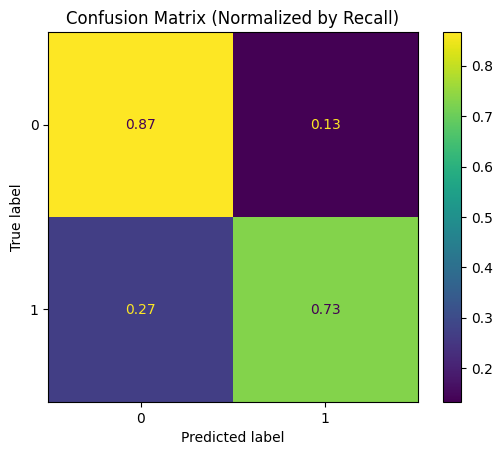

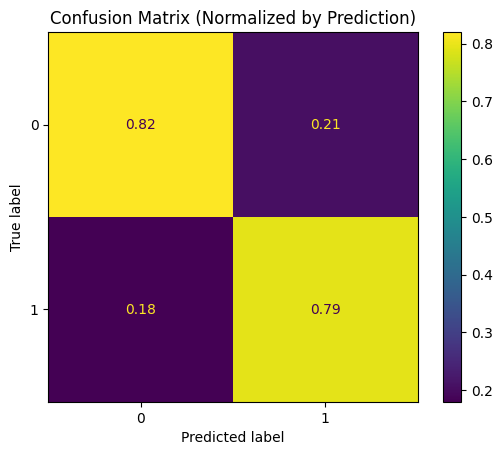

(0.8100558659217877, 0.8069687334393216, 0.7981981981981983)


In [5]:
metricas_2 = ["ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX", "MATRIX_RECALL", "MATRIX_PRED"]

resultados = eval_model(y_test_titanic, predicciones_titanic, "clasificacion", metricas_2)
print(resultados)

RMSE: 0.43582580703557733
MAE: 0.18994413407821228
MAPE: inf


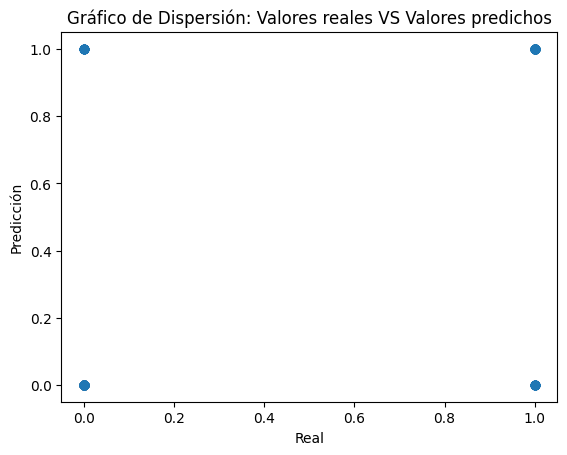

(0.43582580703557733, 0.18994413407821228, inf)


In [6]:
metricas_3 = ["RMSE", "MAE", "MAPE", "GRAPH"]

resultados = eval_model(y_test_titanic, predicciones_titanic, "regresion", metricas_3)
print(resultados)